# Paper Reproducing
In this part we will attempt to reproduce the correlation results from the original paper. This is done both to provide a sanity check, but also to create the general functions we will use later to calcuate the correlation on the data from the models

In [1]:
import pandas as pd
import netCDF4 as nc
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import interpolate
import scipy
import tqdm
import matplotlib.colors as mcolors
from helpers import process_h as helper
from helpers import visualize_h as vis_helper


In [2]:
data_relative_path = os.path.join('..', 'Data')
precipitation_path = os.path.join(data_relative_path,'CMIP6','Precipitation')
WTIO_path = os.path.join(data_relative_path,'CMIP6','WTIO')
SEIO_path = os.path.join(data_relative_path,'CMIP6','SEIO')
CHIRPS_path = os.path.join(data_relative_path,'CHIRPS2')

# Constants 

In [3]:
df_dmi = pd.read_csv(f"{data_relative_path}/PSL/DMI.csv")
df_wtio = pd.read_csv(f"{data_relative_path}/PSL/WTIO.csv")
df_seio = pd.read_csv(f"{data_relative_path}/PSL/SEIO.csv")

bounds_lat = [20, 40]
bounds_lon = [20, 50]
boundaries = bounds_lon + bounds_lat

In [4]:
df_dmi.set_index('Year', inplace=True)
df_wtio.set_index('Year', inplace=True)
df_seio.set_index('Year', inplace=True)

In [5]:
df_dmi = df_dmi.query('Year >= 1981 and Year <= 2010')
df_wtio = df_wtio.query('Year >= 1981 and Year <= 2010')
df_seio = df_seio.query('Year >= 1981 and Year <= 2010')

In [6]:
dmi_oct = df_dmi['10']
wtio_oct = df_wtio['10']
seio_oct = df_seio['10']
obs_iod = pd.concat([dmi_oct, wtio_oct, seio_oct], axis=1, keys=['DMI', 'WTIO', 'SEIO'])

np.float64(0.7453778857286607)

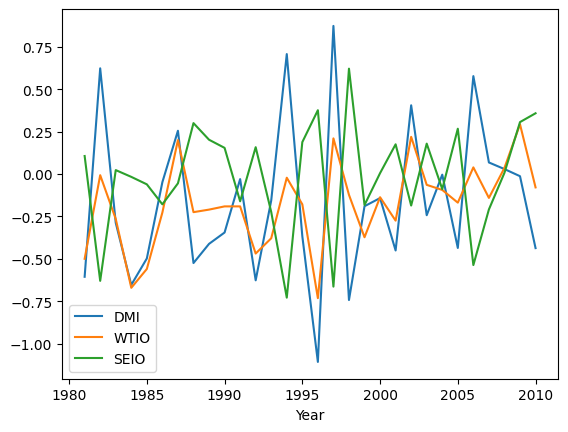

In [7]:
obs_iod.plot()
plt.legend(['DMI', 'WTIO', 'SEIO'])
obs_iod.corr()['DMI']['WTIO']

Next, we will plot the correlation between the DMI and the precipitation data.

In [9]:
chirps_data = nc.Dataset(f"{CHIRPS_path}/chirps_octobers_middle_east_1981_2010.nc")

chirps_precip_data = chirps_data['precip'][:]


corr_map = helper.calc_dmi_precp_corr_loop(dmi_oct.values, chirps_precip_data)

# corr_map = calc_dmi_precp_corr_vec(dmi_oct.values, chirps_precip_data)

C:\Users\benmo\שולחן העבודה\sub-seasonal-cmip-analysis\finalProjVenv\lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\benmo\שולחן העבודה\sub-seasonal-cmip-analysis\finalProjVenv\lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [13]:
alpha = 0.05
corr_map_tested = np.where(helper.calc_corr_t_test(corr_map) < alpha, 0, corr_map)

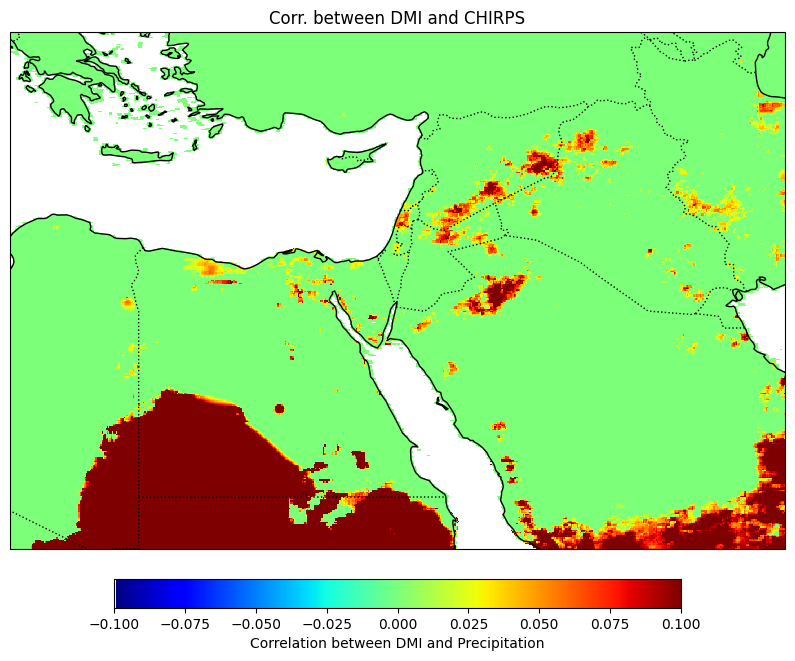

In [14]:
fig7, ax7 = plt.subplots(1, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
vis_helper.plot_precp_heatmap(ax7, corr_map_tested, boundaries, 'Correlation between DMI and Precipitation', 'Corr. between DMI and CHIRPS', 0)

In [15]:
corr_map_tested

array([[0.        , 0.        , 0.        , ..., 0.11945747, 0.1342707 ,
        0.13912797],
       [0.        , 0.        , 0.        , ..., 0.11825336, 0.13084313,
        0.13999446],
       [0.        , 0.        , 0.        , ..., 0.13569957, 0.14593466,
        0.15855916],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [17]:
helper.calc_corr_t_test(corr_map)

array([[-1.57989015, -1.54122997, -1.08161103, ...,  0.63666849,
         0.71698631,  0.74342627],
       [-1.59402444, -1.59214453, -1.0765943 , ...,  0.63015953,
         0.69836052,  0.74814863],
       [-1.61919107, -1.60906153, -1.1315095 , ...,  0.72475862,
         0.78057024,  0.84976617],
       ...,
       [-2.0176577 , -2.14479745, -2.07754425, ..., -1.08488082,
        -1.11475345, -0.99673162],
       [-2.08506666, -2.09497276, -2.04578578, ..., -0.96087463,
        -0.90249075, -0.95712985],
       [-2.11536449, -2.0859533 , -2.11790639, ..., -0.958342  ,
        -0.84952146, -0.90918904]])